# I. Importation et découverte des données

##  Installation des Packages

In [1]:
pip install requests 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lxml 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install selenium 

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


* requests est un package servant à récupérer les données d'un site web
* lxml est un package servant à télécharger des fichiers lxml
* selenium est un package servant à l'interaction automatisée avec un serveur

## Importation des Librairies

In [5]:
import lxml
import selenium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import bs4
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme()


##  Création de la base "Races"

* Récupération des données à partir d'une API en ligne : "ergast.com"
* Objectif : création d'une base "Races" regroupant les années des saisons, le nom et le rang du circuit dans la saison, la latitude et la longitude du circuit (utile plus tard pour les représentations géographiques), le pays et la date du circuit, ainsi que l'url wikipédia associé
* La base contient 550 lignes correspondant aux saisons comprises entre 1990 et 2020

In [6]:

races = {'season': [],
        'round': [],
        'circuit_id': [],
        'lat': [],
        'long': [],
        'country': [],
        'date': [],
        'url': []}

for year in list(range(1990,2021)):
    
    url = 'https://ergast.com/api/f1/{}.json'
    r = requests.get(url.format(year))
    json = r.json()

    for item in json['MRData']['RaceTable']['Races']:
        try:
            races['season'].append(int(item['season']))
        except:
            races['season'].append(None)

        try:
            races['round'].append(int(item['round']))
        except:
            races['round'].append(None)

        try:
            races['circuit_id'].append(item['Circuit']['circuitId'])
        except:
            races['circuit_id'].append(None)

        try:
            races['lat'].append(float(item['Circuit']['Location']['lat']))
        except:
            races['lat'].append(None)

        try:
            races['long'].append(float(item['Circuit']['Location']['long']))
        except:
            races['long'].append(None)

        try:
            races['country'].append(item['Circuit']['Location']['country'])
        except:
            races['country'].append(None)

        try:
            races['date'].append(item['date'])
        except:
            races['date'].append(None)

        try:
            races['url'].append(item['url'])
        except:
            races['url'].append(None)
        
races= pd.DataFrame(races)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [3]:
races.head()

,season,round,circuit_id,lat,long,country,date,url
0,2018,1,albert_park,-37.8497,144.96800,Australia,2018-03-25,https://en.wikipedia.org/wiki/2018_Australian_...
1,2018,2,bahrain,26.0325,50.51060,Bahrain,2018-04-08,https://en.wikipedia.org/wiki/2018_Bahrain_Gra...
2,2018,3,shanghai,31.3389,121.22000,China,2018-04-15,https://en.wikipedia.org/wiki/2018_Chinese_Gra...
3,2018,4,BAK,40.3725,49.85330,Azerbaijan,2018-04-29,https://en.wikipedia.org/wiki/2018_Azerbaijan_...
4,2018,5,catalunya,41.5700,2.26111,Spain,2018-05-13,https://en.wikipedia.org/wiki/2018_Spanish_Gra...


In [4]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      59 non-null     int64  
 1   round       59 non-null     int64  
 2   circuit_id  59 non-null     object 
 3   lat         59 non-null     float64
 4   long        59 non-null     float64
 5   country     59 non-null     object 
 6   date        59 non-null     object 
 7   url         59 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 3.8+ KB


##  Création de la  base "Results"

## Création de la bas "driver standings"

* Objectif : création d'une deuxième base incluant notamment la position sur la grille de départ et le podium final
* Observations de valeurs manquantes sur la variable "time" : on choisit donc de l'exclure (64% de valeurs manquantes)

In [8]:
rounds = []
for year in np.array(races.season.unique()):
    rounds.append([year, list(races[races.season == year]['round'])])

print(rounds)
# query API
    
results = {'season': [],
          'round':[],
           'circuit_id':[],
          'driver': [],
           'date_of_birth': [],
           'nationality': [],
          'constructor': [],
          'grid': [],
          'time': [],
          'status': [],
          'points': [],
          'podium': []}

for n in list(range(len(rounds))):
    for i in rounds[n][1]:
    
        url = 'http://ergast.com/api/f1/{}/{}/results.json'
        r = requests.get(url.format(rounds[n][0], i))
        json = r.json()

        for item in json['MRData']['RaceTable']['Races'][0]['Results']:
            try:
                results['season'].append(int(json['MRData']['RaceTable']['Races'][0]['season']))
            except:
                results['season'].append(None)

            try:
                results['round'].append(int(json['MRData']['RaceTable']['Races'][0]['round']))
            except:
                results['round'].append(None)

            try:
                results['circuit_id'].append(json['MRData']['RaceTable']['Races'][0]['Circuit']['circuitId'])
            except:
                results['circuit_id'].append(None)

            try:
                results['driver'].append(item['Driver']['driverId'])
            except:
                results['driver'].append(None)
            
            try:
                results['date_of_birth'].append(item['Driver']['dateOfBirth'])
            except:
                results['date_of_birth'].append(None)
                
            try:
                results['nationality'].append(item['Driver']['nationality'])
            except:
                results['nationality'].append(None)

            try:
                results['constructor'].append(item['Constructor']['constructorId'])
            except:
                results['constructor'].append(None)

            try:
                results['grid'].append(int(item['grid']))
            except:
                results['grid'].append(None)

            try:
                results['time'].append(int(item['Time']['millis']))
            except:
                results['time'].append(None)

            try:
                results['status'].append(item['status'])
            except:
                results['status'].append(None)

            try:
                results['points'].append(int(item['points']))
            except:
                results['points'].append(None)

            try:
                results['podium'].append(int(item['position']))
            except:
                results['podium'].append(None)

           
results = pd.DataFrame(results)

AttributeError: 'dict' object has no attribute 'season'

In [6]:
results.head()

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium
0,2018,1,albert_park,vettel,1987-07-03,German,ferrari,3,5373283.0,Finished,25,1
1,2018,1,albert_park,hamilton,1985-01-07,British,mercedes,1,5378319.0,Finished,18,2
2,2018,1,albert_park,raikkonen,1979-10-17,Finnish,ferrari,2,5379592.0,Finished,15,3
3,2018,1,albert_park,ricciardo,1989-07-01,Australian,red_bull,8,5380352.0,Finished,12,4
4,2018,1,albert_park,alonso,1981-07-29,Spanish,mclaren,10,5401169.0,Finished,10,5


In [7]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         1180 non-null   int64  
 1   round          1180 non-null   int64  
 2   circuit_id     1180 non-null   object 
 3   driver         1180 non-null   object 
 4   date_of_birth  1180 non-null   object 
 5   nationality    1180 non-null   object 
 6   constructor    1180 non-null   object 
 7   grid           1180 non-null   int64  
 8   time           579 non-null    float64
 9   status         1180 non-null   object 
 10  points         1180 non-null   int64  
 11  podium         1180 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 110.8+ KB


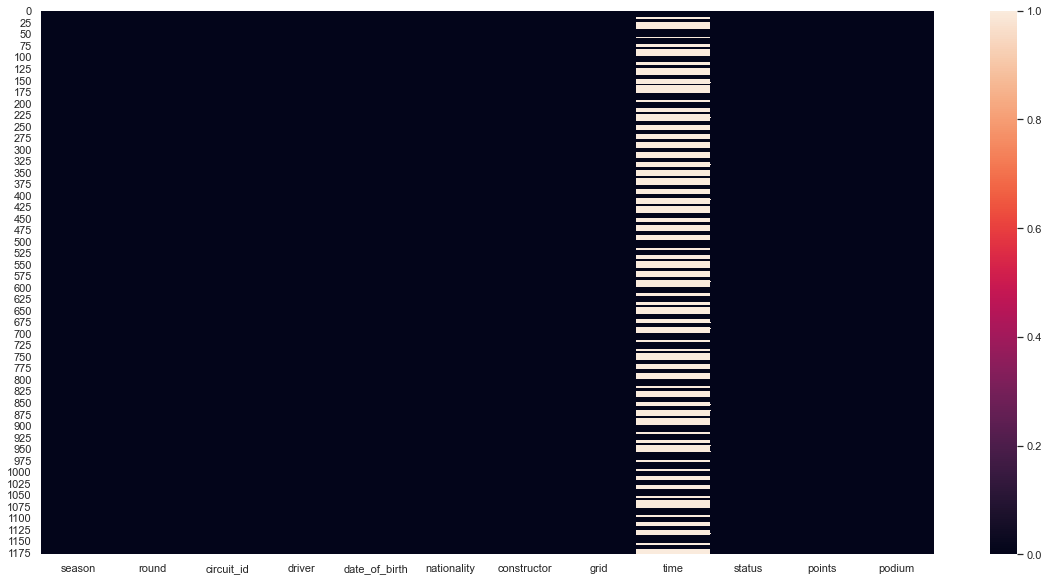

In [8]:
results_na=results.copy()
sns.heatmap(results_na.isna()) # On visualise l'emplacements des valeurs manquantes On a bcp de valeurs manquantes et un peu partout
results_na.isna()['time'].mean() # 64% de valeurs manquantes on ne va donc pas utilise

results=results.drop(labels='time', axis=1) #suppression de la colonne aux données manquantes

## Création de la base "driver_standings"

In [21]:
driver_standings = {'season': [],
                    'round':[],
                    'driver': [],
                    'driver_points': [],
                    'driver_wins': [],
                   'driver_standings_pos': []}

# query API

for n in list(range(len(rounds))):     
    for i in rounds[n][1]:    # iterate through rounds of each year
    
        url = 'https://ergast.com/api/f1/{}/{}/driverStandings.json'
        r = requests.get(url.format(rounds[n][0], i))
        json = r.json()

        for item in json['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings']:
            try:
                driver_standings['season'].append(int(json['MRData']['StandingsTable']['StandingsLists'][0]['season']))
            except:
                driver_standings['season'].append(None)

            try:
                driver_standings['round'].append(int(json['MRData']['StandingsTable']['StandingsLists'][0]['round']))
            except:
                driver_standings['round'].append(None)
                                         
            try:
                driver_standings['driver'].append(item['Driver']['driverId'])
            except:
                driver_standings['driver'].append(None)
            
            try:
                driver_standings['driver_points'].append(int(item['points']))
            except:
                driver_standings['driver_points'].append(None)
            
            try:
                driver_standings['driver_wins'].append(int(item['wins']))
            except:
                driver_standings['driver_wins'].append(None)
                
            try:
                driver_standings['driver_standings_pos'].append(int(item['position']))
            except:
                driver_standings['driver_standings_pos'].append(None)
            
driver_standings = pd.DataFrame(driver_standings)

# define lookup function to shift points and number of wins from previous rounds

def lookup (df, team, points):
    df['lookup1'] = df.season.astype(str) + df[team] + df['round'].astype(str)
    df['lookup2'] = df.season.astype(str) + df[team] + (df['round']-1).astype(str)
    new_df = df.merge(df[['lookup1', points]], how = 'left', left_on='lookup2',right_on='lookup1')
    new_df.drop(['lookup1_x', 'lookup2', 'lookup1_y'], axis = 1, inplace = True)
    new_df.rename(columns = {points+'_x': points+'_after_race', points+'_y': points}, inplace = True)
    new_df[points].fillna(0, inplace = True)
    return new_df
  
driver_standings = lookup(driver_standings, 'driver', 'driver_points')
driver_standings = lookup(driver_standings, 'driver', 'driver_wins')
driver_standings = lookup(driver_standings, 'driver', 'driver_standings_pos')

driver_standings.drop(['driver_points_after_race', 'driver_wins_after_race', 'driver_standings_pos_after_race'], 
                      axis = 1, inplace = True)

## Création de la base "constructor_standings"

In [22]:
# start from year 1990

constructor_rounds = rounds

constructor_standings = {'season': [],
                    'round':[],
                    'constructor': [],
                    'constructor_points': [],
                    'constructor_wins': [],
                   'constructor_standings_pos': []}
# query API

for n in list(range(len(constructor_rounds))):
    for i in constructor_rounds[n][1]:
    
        url = 'https://ergast.com/api/f1/{}/{}/constructorStandings.json'
        r = requests.get(url.format(constructor_rounds[n][0], i))
        json = r.json()

        for item in json['MRData']['StandingsTable']['StandingsLists'][0]['ConstructorStandings']:
            try:
                constructor_standings['season'].append(int(json['MRData']['StandingsTable']['StandingsLists'][0]['season']))
            except:
                constructor_standings['season'].append(None)

            try:
                constructor_standings['round'].append(int(json['MRData']['StandingsTable']['StandingsLists'][0]['round']))
            except:
                constructor_standings['round'].append(None)
                                         
            try:
                constructor_standings['constructor'].append(item['Constructor']['constructorId'])
            except:
                constructor_standings['constructor'].append(None)
            
            try:
                constructor_standings['constructor_points'].append(int(item['points']))
            except:
                constructor_standings['constructor_points'].append(None)
            
            try:
                constructor_standings['constructor_wins'].append(int(item['wins']))
            except:
                constructor_standings['constructor_wins'].append(None)
                
            try:
                constructor_standings['constructor_standings_pos'].append(int(item['position']))
            except:
                constructor_standings['constructor_standings_pos'].append(None)
            
constructor_standings = pd.DataFrame(constructor_standings)

constructor_standings = lookup(constructor_standings, 'constructor', 'constructor_points')
constructor_standings = lookup(constructor_standings, 'constructor', 'constructor_wins')
constructor_standings = lookup(constructor_standings, 'constructor', 'constructor_standings_pos')

constructor_standings.drop(['constructor_points_after_race', 'constructor_wins_after_race','constructor_standings_pos_after_race' ],
                           axis = 1, inplace = True)

## Création de la base "qualifying_results"

In [23]:
import bs4
from bs4 import BeautifulSoup

qualifying_results = pd.DataFrame()

for year in list(range(1990,2021)):
    url = 'https://www.formula1.com/en/results.html/{}/races.html'
    r = requests.get(url.format(year))
    soup = BeautifulSoup(r.text, 'html.parser')
    
    # find links to all circuits for a certain year
    
    year_links = []
    for page in soup.find_all('a', attrs = {'class':"resultsarchive-filter-item-link FilterTrigger"}):
        link = page.get('href')
        if f'/en/results.html/{year}/races/' in link: 
            year_links.append(link)
    
    # for each circuit, switch to the starting grid page and read table

    year_df = pd.DataFrame()
    new_url = 'https://www.formula1.com{}'
    for n, link in list(enumerate(year_links)):
        link = link.replace('race-result.html', 'starting-grid.html')
        df = pd.read_html(new_url.format(link))
        df = df[0]
        df['season'] = year
        df['round'] = n+1
        for col in df:
            if 'Unnamed' in col:
                df.drop(col, axis = 1, inplace = True)

        year_df = pd.concat([year_df, df])

    # concatenate all tables from all years  
        
    qualifying_results = pd.concat([qualifying_results, year_df])

# rename columns
    
qualifying_results.rename(columns = {'Pos': 'grid', 'Driver': 'driver_name', 'Car': 'car',
                                     'Time': 'qualifying_time'}, inplace = True)
# drop driver number column

qualifying_results.drop('No', axis = 1, inplace = True)

##  Création de la base "weather" 

* Objectif : création d'une deuxième base incluant les conditions météorologiques pour chaque course 

In [24]:
from selenium import webdriver

weather = races.iloc[:,[0,1,2]]

info = []

# read wikipedia tables

for link in races.url:
    try:
        df = pd.read_html(link)[0]
        if 'Weather' in list(df.iloc[:,0]):
            n = list(df.iloc[:,0]).index('Weather')
            info.append(df.iloc[n,1])
        else:
            df = pd.read_html(link)[1]
            if 'Weather' in list(df.iloc[:,0]):
                n = list(df.iloc[:,0]).index('Weather')
                info.append(df.iloc[n,1])
            else:
                df = pd.read_html(link)[2]
                if 'Weather' in list(df.iloc[:,0]):
                    n = list(df.iloc[:,0]).index('Weather')
                    info.append(df.iloc[n,1])
                else:
                    df = pd.read_html(link)[3]
                    if 'Weather' in list(df.iloc[:,0]):
                        n = list(df.iloc[:,0]).index('Weather')
                        info.append(df.iloc[n,1])
                    else:
                        driver = webdriver.Chrome()
                        driver.get(link)

                        # click language button
                        button = driver.find_element_by_link_text('Français')
                        button.click()
                        
                        # find weather in italian with selenium
                        
                        clima = driver.find_element_by_xpath('//*[@id="mw-content-text"]/div/table[1]/tbody/tr[9]/td').text
                        info.append(clima) 
                                
    except:
        info.append('not found')

# append column with weather information to dataframe  
  
weather['weather'] = info

# set up a dictionary to convert weather information into keywords

weather_dict = {'weather_warm': ['clair', 'clear', 'warm', 'hot', 'sunny', 'fine', 'mild', 'dégagé'],
               'weather_cold': ['cold', 'fresh', 'chilly', 'cool'],
               'weather_dry': ['dry', 'humide'],
               'weather_wet': ['showers', 'wet', 'rain', 'pluvieux', 'damp', 'thunderstorms', 'rainy'],
               'weather_cloudy': ['overcast', 'nuageux', 'clouds', 'cloudy', 'grey', 'gris']}

# map new df according to weather dictionary

weather_df = pd.DataFrame(columns = weather_dict.keys())
for col in weather_df:
    weather_df[col] = weather['weather'].map(lambda x: 1 if any(i in weather_dict[col] for i in x.lower().split()) else 0)
   
weather_info = pd.concat([weather, weather_df], axis = 1)

<ipython-input-24-84e46cc0848e>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['weather'] = info


In [25]:
weather_info

,season,round,circuit_id,weather,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,1990,1,phoenix,Cloudy and cool with temperatures reaching up ...,0,1,0,0,1
1,1990,2,interlagos,"Hot, dry, sunny",1,0,0,0,0
2,1990,3,imola,"Warm, dry, sunny",1,0,0,0,0
3,1990,4,monaco,"Warm, dry, sunny",1,0,0,0,0
4,1990,5,villeneuve,Warm and cloudy with temperatures approaching ...,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
546,2020,13,imola,Partly cloudy,0,0,0,0,1
547,2020,14,istanbul,Overcast. Wet and drying track. Air: 11–14 °C ...,0,0,0,1,0
548,2020,15,bahrain,Clear,1,0,0,0,0
549,2020,16,bahrain,Clear,1,0,0,0,0


# II- Statistiques descriptives et études du lien entre nos variables et la victoire 

## II-1. Corrélation entre la Grille de départ et le classement d'arrivée

* La première idée est d'étudier le lien entre la grille de départ et le classement final. En effet, cela nous paraît le premier critère qui va determiner l'issue de la course

###  Première étude de corrélation

* On trace donc le nuage de point pour toutes les données dont nous disposons

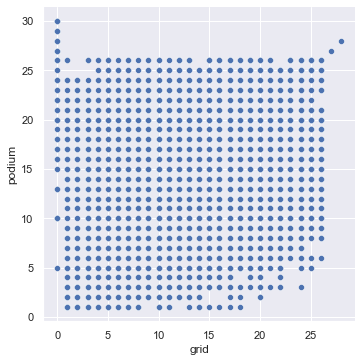

In [26]:
sns.relplot(x="grid", y="podium", data=results)

* Commentaires : A première vue, il n'y a pas de corrélations claires entre la position initiale sur la grille et la position d'arrivée. Cela est surement dû au nombre de données et aux années totalement différentes qu'on étudie : il y a beaucoup de bruit.

* Nous traçons ensuite ce nuage de point pour l'année 2020, afin de pouvoir mieux visualiser les points, et par circuit afin de visualiser des tendances par circuit.

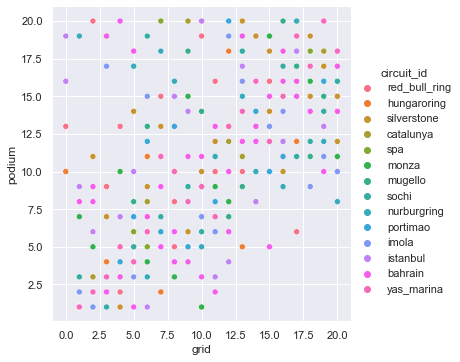

In [27]:
results_2020=results.copy()
results_2020=results_2020[results_2020["season"]>=2020]
sns.relplot(x="grid", y="podium", data=results_2020[results_2020["season"]==2020],hue="circuit_id")


* Commentaires : On n'observe pas une corrélation encore très franche, mais une tendance linéaire se dessine tout de même 

### Création d'une fonction de corrélation entre la grille et le podium

In [28]:
results_2010=results[results["season"]>=2010].copy() # je prends uniquement les courses à partir de 2010

In [29]:
# Cette fonction donne la corrélation par circuit à l'année choisie entre le podium et la grille 
    
def corr_grid_podium(annee):
    
    circuits=results_2010[results_2010["season"] ==annee]["circuit_id"].unique()
    df=results_2010[results_2010["season"] ==annee]
    les_correlations={}

    for circuit in circuits:
        df1=df[df["circuit_id"]==circuit][['grid',"podium"]]
        corr=df1.corr()["podium"][0]
        les_correlations[circuit]=corr
    
    df2=pd.DataFrame(list(les_correlations.items()),
                   columns=['circuit_id', 'correlation_grid_pod'])
    df2=df2.sort_values(by='correlation_grid_pod',ascending=False)

    print(df2)

    _,(ax1) = plt.subplots(ncols=1)
    sns.barplot(data=df2, x='circuit_id', y='correlation_grid_pod', ax=ax1, palette=sns.color_palette("icefire"))
    

        circuit_id  correlation_grid_pod
7           ricard              0.851128
5           monaco              0.846617
14      marina_bay              0.840602
11     hungaroring              0.803008
4        catalunya              0.775940
17       rodriguez              0.762406
0      albert_park              0.718797
2         shanghai              0.711278
9      silverstone              0.684211
20      yas_marina              0.664662
1          bahrain              0.622556
18        americas              0.590977
6       villeneuve              0.575940
8    red_bull_ring              0.544361
15           sochi              0.535338
16          suzuka              0.503759
3              BAK              0.354306
13           monza              0.324812
12             spa              0.231579
19      interlagos              0.129323
10  hockenheimring             -0.073684
None


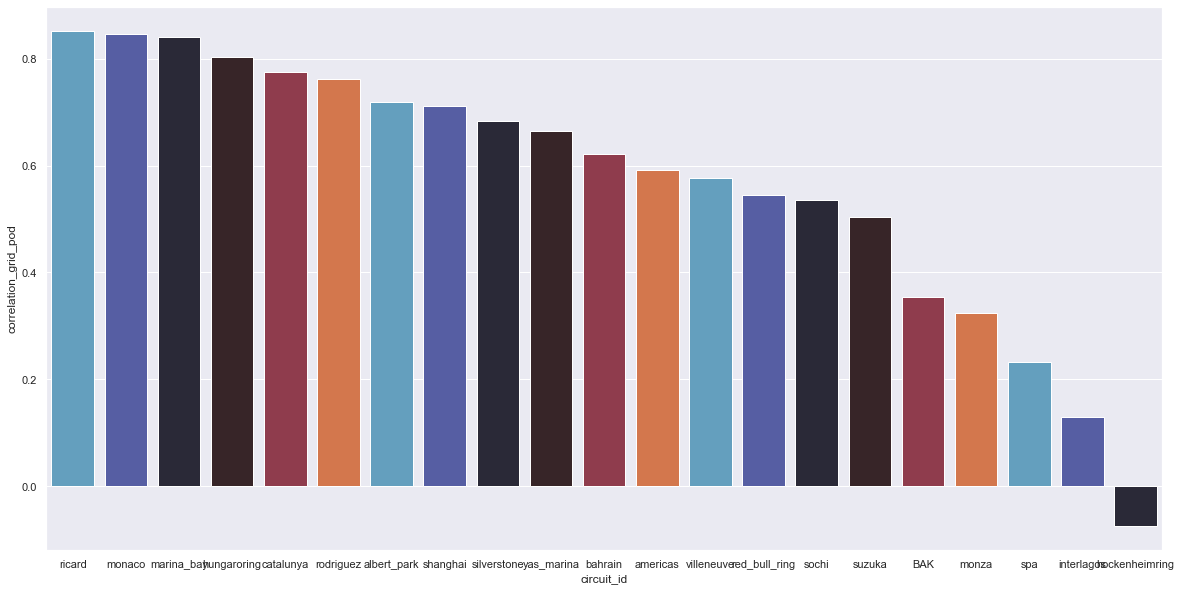

In [23]:
print(corr_grid_podium(2019)) # On choisit arbitraiement 2019 ici

* Observations : On observe une corrélation proche de 0.84 (proche de 1) pour le circuit de Monaco, ce qui est cohérent car les rues sont très étroites pour effectuer un dépassement. Au contraire, il est très facile de manoeuvrer sur le circuit de SPa, d'où une corrélation bien plus faible.

# II-2. Corrélation entre le constructeur et les classemements sur la grille et à l'arrivée

* Notre deuxième idée est d'étudier l'importance du constructeur dans la victoire finale

##  Position Moyenne des constructeurs sur la grille et à l'arrivée

In [16]:
results_constructeur=results.copy()
results_constructeur=results_constructeur[["constructor","podium","grid"]]

In [17]:
results_constructeur.groupby("constructor").mean().sort_values(by="podium",ascending=True)

,podium,grid
constructor,,
mercedes,3.601695,2.898305
ferrari,6.974576,5.652542
red_bull,7.169492,6.279661
racing_point,10.631579,11.315789
alphatauri,10.705882,11.235294
renault,10.779661,10.076271
mclaren,10.830508,11.084746
force_india,11.190476,10.690476
toro_rosso,12.690476,13.214286


* Observations : Comme l'on pouvait le prévoir, les constructeurs Mercedes, Ferrari et RedBull ont la meilleure moyenne en terme de position initiale et de place à l'arrivée

##  Pourcentage de courses gagnées par constructeur depuis 1990

<AxesSubplot:xlabel='constructor', ylabel='podium'>

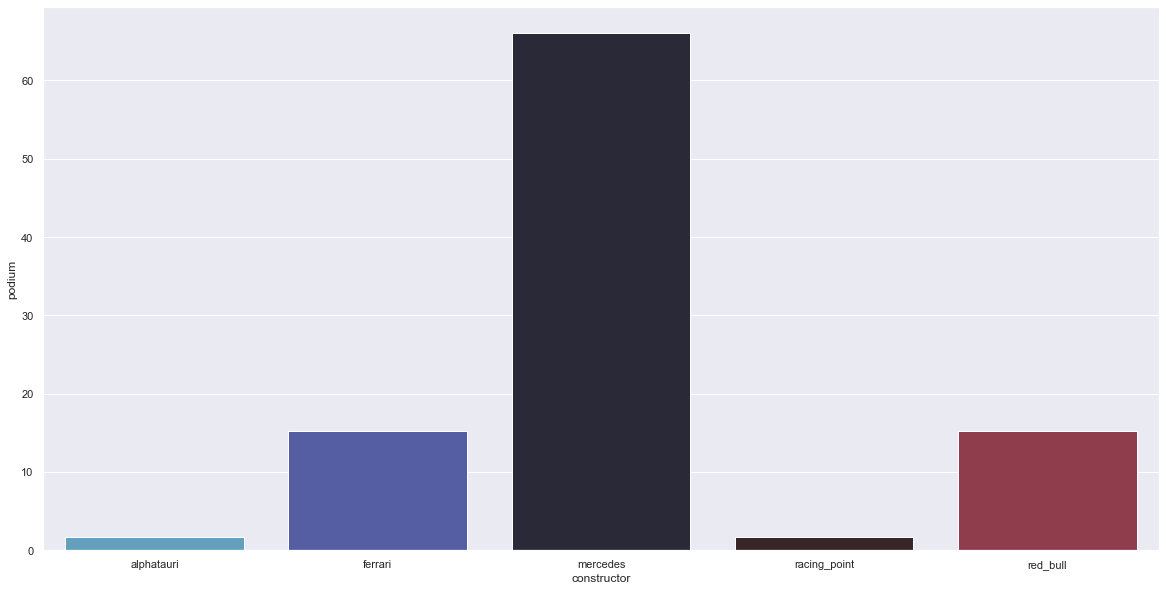

In [18]:
results_constructeur_1=results_constructeur.copy()
results_constructeur_1=results_constructeur_1[results_constructeur_1["podium"]==1]
df=(results_constructeur_1.groupby("constructor").count())/len(results_constructeur_1)*100
df=df.reset_index()
_,(ax1) = plt.subplots(ncols=1)
sns.barplot(data=df, x='constructor', y='podium', ax=ax1, palette=sns.color_palette("icefire"))

* Observations : là encore, sans grande surprise, des constructeurs sortent du lot, comme Ferrari, McLaren, et Mercedes. On observe une très grande disparité entre les constructeurs, ainsi le constructeur contient du signal à exploiter pour prédire la victoire finale

# II-3. Corrélation entre la nationalité du pilote et la victoire finale 

* Nous nous interessons ensuite au lien entre la nationalité et la victoire. Nous allons essayer de savoir si cette variable permet d'expliquer, prédire la victoire finale. On va alors tout simplement tracer le pourcentage de victoire par nationalité. 

In [19]:
results_nationality=results.copy()
results_nationality=results_nationality[["nationality","grid","podium","circuit_id"]]

<AxesSubplot:xlabel='nationality', ylabel='podium'>

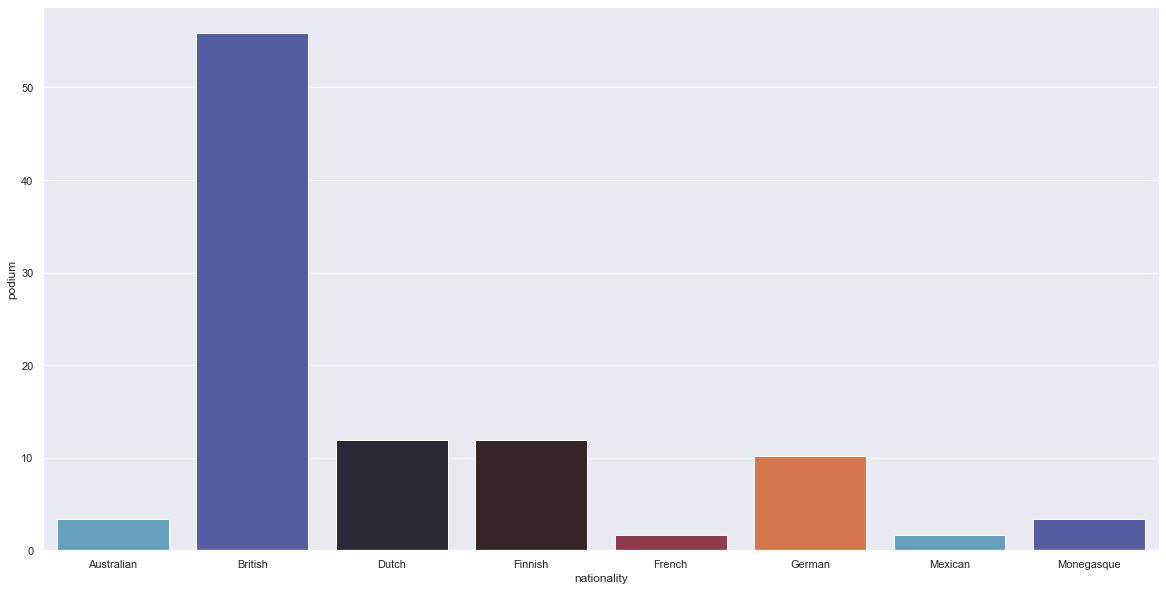

In [20]:
nb_courses=len(results_nationality[results_nationality["podium"]==1])
df=((results_nationality[results_nationality["podium"]==1].groupby("nationality").count())/(nb_courses))*100
df=df.reset_index()
sns.barplot(x='nationality',y='podium',data=df,palette=sns.color_palette("icefire"))

* Commentaires : Sans surprise, les pilotes les plus titrés sur les grands prix sont de nationalité allemande (Vettel, Schumacher, Rosberg), Anglaise (Hamilton), Brésilienne (Senna) et FInlandaise (Räikkönen). On remarque une disparité entre les nationalité, cela signifie donc que la nationalité est une donnée importante

In [23]:
# On rajoute alors la nationalité à notre dataframe results
df_country_race=races[["circuit_id","country"]].copy()
df_country_race.head()
results_merged=results.merge(df_country_race ,how='left', on="circuit_id")

In [24]:
print(results_merged)
print(results_merged["nationality"].unique())
print(results_merged["country"].unique())

      season  round   circuit_id             driver date_of_birth nationality  \
0       2018      1  albert_park             vettel    1987-07-03      German   
1       2018      1  albert_park             vettel    1987-07-03      German   
2       2018      1  albert_park           hamilton    1985-01-07     British   
3       2018      1  albert_park           hamilton    1985-01-07     British   
4       2018      1  albert_park          raikkonen    1979-10-17     Finnish   
...      ...    ...          ...                ...           ...         ...   
3095    2020     17   yas_marina  pietro_fittipaldi    1996-06-25   Brazilian   
3096    2020     17   yas_marina  pietro_fittipaldi    1996-06-25   Brazilian   
3097    2020     17   yas_marina              perez    1990-01-26     Mexican   
3098    2020     17   yas_marina              perez    1990-01-26     Mexican   
3099    2020     17   yas_marina              perez    1990-01-26     Mexican   

       constructor  grid   

## II-4. Corrélation entre l'âge et les victoires sur les grands prix

* Nous étudions maintenant le lien entre l'âge et la victoire finale.

* Pour cela on créé ci-dessous la variable âge en année qui correspond à l'âge au moment du grand prix

In [30]:
results_age=results.copy() #on copie la base results dans une nouvelle base qu'on va retravailler

results_age["date_of_birth"]=pd.to_datetime(results_age["date_of_birth"])

results_age["season"]=pd.to_datetime(results_age["season"], format="%Y") # conversion en format date

results_age["age"]=round(((results_age["season"]-results_age['date_of_birth']).dt.days)/365) #On détermine l'âge en année

* On visualise rapidement les variables qu'on a créée

In [26]:
results_age["date_of_birth"]

0      1987-07-03
1      1985-01-07
2      1979-10-17
3      1989-07-01
4      1981-07-29
          ...    
1175   1993-12-14
1176   1995-06-29
1177   1992-10-05
1178   1996-06-25
1179   1990-01-26
Name: date_of_birth, Length: 1180, dtype: datetime64[ns]

In [27]:
results_age["season"]

0      2018-01-01
1      2018-01-01
2      2018-01-01
3      2018-01-01
4      2018-01-01
          ...    
1175   2020-01-01
1176   2020-01-01
1177   2020-01-01
1178   2020-01-01
1179   2020-01-01
Name: season, Length: 1180, dtype: datetime64[ns]

In [28]:
results_age["age"]

0       31.0
1       33.0
2       38.0
3       29.0
4       36.0
        ... 
1175    26.0
1176    25.0
1177    27.0
1178    24.0
1179    30.0
Name: age, Length: 1180, dtype: float64

### Correlation entre le podium et l'âge des pilotes au moment de la course

<AxesSubplot:>

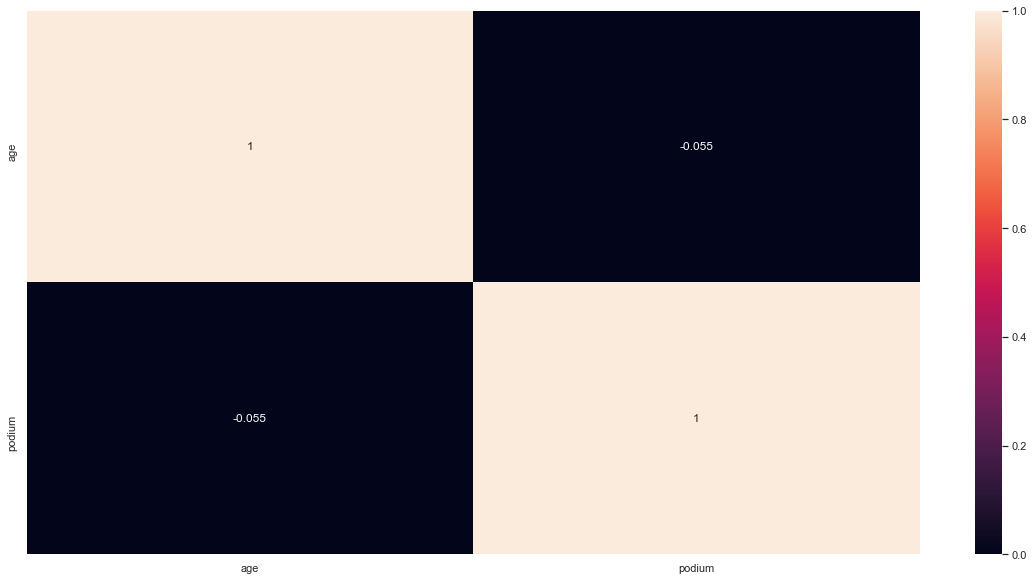

In [32]:
df=results_age[["age","podium"]]

corr = df.corr()
sns.heatmap(corr,annot=True,vmin=0, vmax=1)# légère corrélation négative avec l'âge, ce n'est pas très significatif 

* Commentaires : On obtient une légére corrélation négative entre l'âge et le classement : c'est à dire que plus on est agé plus on est associé à un classement bas et donc proche de la victoire.

### Répartition des victoires en fonction de l'âge

* On trace le nombre de victoire par age, on trace également une approximation de la densité

<AxesSubplot:xlabel='age', ylabel='Count'>

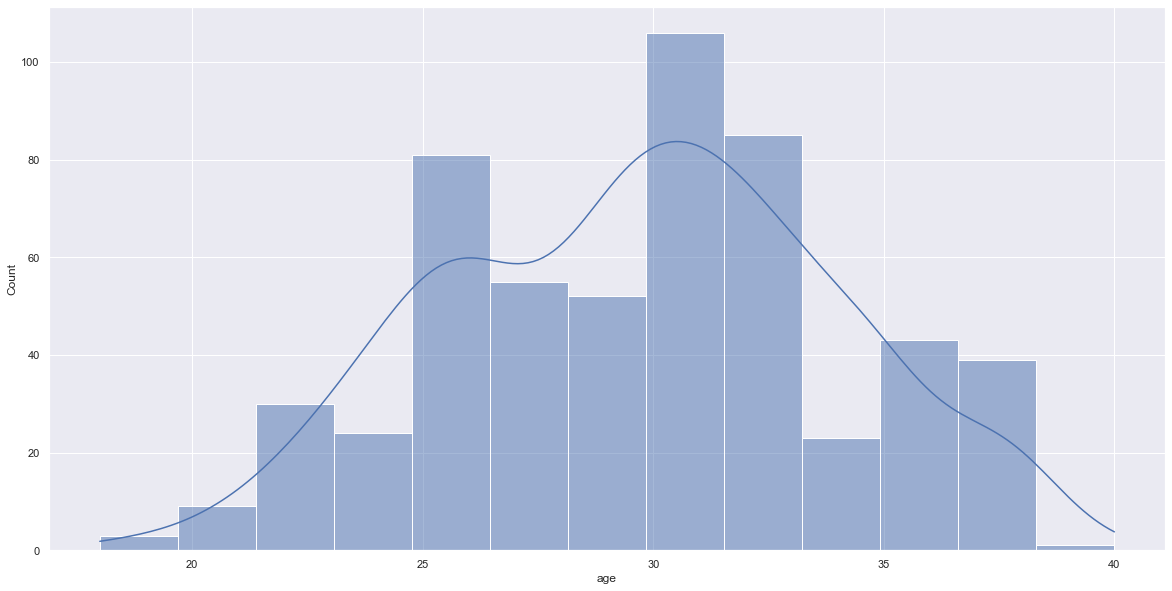

In [33]:
df_gagnant=df[df["podium"]==1]
sns.histplot(data=df_gagnant, x='age',kde=True) 

* Commentaires : On remarque qu'on a un pic à 30 ans, cela correspondrait donc au bon ratio entre âge et expérience. On observe encore une fois une disparité de la répartition, ce qui signifie que l'âge contient de l'information permettant de prédire la victoire 

## II-6. Analyse de la météo 

In [10]:
weather_info

,season,round,circuit_id,weather,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,2018,1,albert_park,Sunny,1,0,0,0,0
1,2018,2,bahrain,not found,0,0,0,0,0
2,2018,3,shanghai,not found,0,0,0,0,0
3,2018,4,BAK,Cloudy,0,0,0,0,1
4,2018,5,catalunya,"Partially cloudy and dry, 16°C and cold.",0,0,0,0,1
5,2018,6,monaco,not found,0,0,0,0,0
6,2018,7,villeneuve,Temperatures reaching up to 22.7 °C (72.9 °F);...,0,0,0,0,0
7,2018,8,ricard,"Partially cloudy, warm and dry",1,0,1,0,0
8,2018,9,red_bull_ring,Sunny,1,0,0,0,0
9,2018,10,silverstone,Sunny 27.0 °C (80.6 °F)[2],1,0,0,0,0


In [48]:
# On rajoute la météo au dataframe results
weather_merged=pd.merge(results, weather_info, how="right", left_on="circuit_id", right_on="circuit_id")

In [45]:
weather_merged["weather"].nunique()

363

* Il y a 363 types de temps différents nous allons donc nous interesser à ceux qui nous paraissent les plus communs

On s'intéresse d'abors aux circuits secs (dry)

        circuit_id  correlation_grid_pod
12         bahrain              0.914783
4   hockenheimring              0.903478
2       villeneuve              0.852174
13        shanghai              0.785217
0       interlagos              0.771304
9        catalunya              0.762609
17      yas_marina              0.746957
7            monza              0.701739
16      marina_bay              0.621739
10     albert_park              0.579130
3      silverstone              0.551304
1           monaco              0.532174
15        valencia              0.528696
5      hungaroring              0.487826
8           suzuka              0.485217
11          sepang              0.346957
6              spa              0.273913
14        istanbul                   NaN
18         yeongam                   NaN


<AxesSubplot:xlabel='circuit_id', ylabel='correlation_grid_pod'>

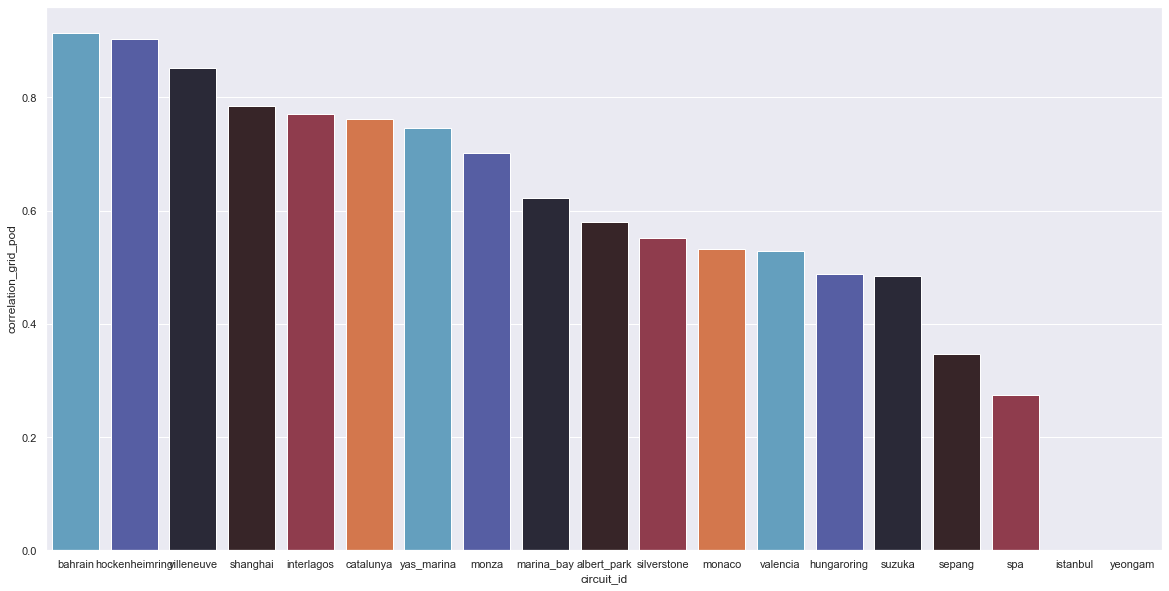

In [49]:
results_2010=weather_merged.copy()
results_2010=results_2010[results_2010["season_x"]>=2010]
circuits=results_2010[results_2010["season_x"] ==2010]["circuit_id"].unique()
df=results_2010[results_2010["season_x"] ==2010]
df_dry=df[df["weather_dry"]==1]
les_correlations={}

for circuit in circuits:
    df_dry_1=df_dry[df_dry["circuit_id"]==circuit][['grid',"podium"]]
    corr=df_dry_1.corr()["podium"][0]
    les_correlations[circuit]=corr
    
df_dry_2=pd.DataFrame(list(les_correlations.items()),
                   columns=['circuit_id', 'correlation_grid_pod'])
df_dry_2=df_dry_2.sort_values(by='correlation_grid_pod',ascending=False)

print(df_dry_2)

_,(ax1) = plt.subplots(ncols=1)
sns.barplot(data=df_dry_2, x='circuit_id', y='correlation_grid_pod', ax=ax1, palette=sns.color_palette("icefire"))

On remarque que pour des circuits comme celui de Bahrein, ou de Hockenheimring, il y a une forte corrélation entre la position sur la grille et le podium final, sur ces circuits secs, on voit donc qu'une bonne position sur la grille assure quasiment un podium final, cette corrélation étant plus importante que lorsqu'on ne considère pas le climat.

Ensuite, on s'intéresse aux circuits mouillés (wet)

        circuit_id  correlation_grid_pod
4   hockenheimring              0.903478
2       villeneuve              0.852174
13        shanghai              0.785217
0       interlagos              0.771304
9        catalunya              0.762609
14        istanbul              0.758261
7            monza              0.701739
16      marina_bay              0.621739
10     albert_park              0.579130
3      silverstone              0.551304
1           monaco              0.532174
5      hungaroring              0.487826
8           suzuka              0.485217
11          sepang              0.346957
18         yeongam              0.312174
6              spa              0.273913
12         bahrain                   NaN
15        valencia                   NaN
17      yas_marina                   NaN


<AxesSubplot:xlabel='circuit_id', ylabel='correlation_grid_pod'>

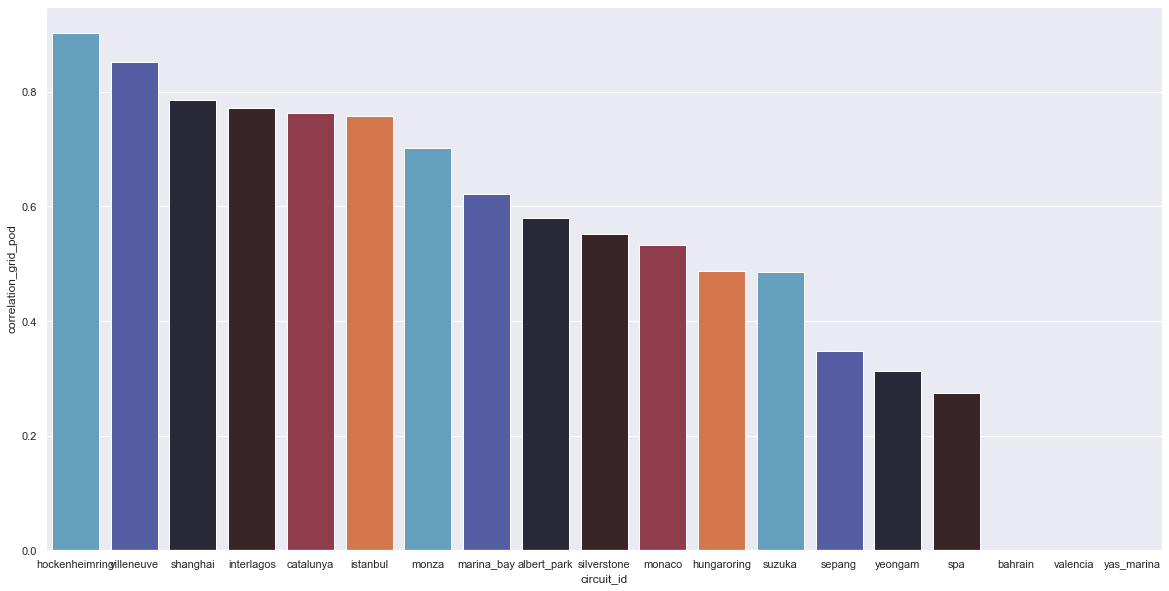

In [50]:
# On trace la correlation entre grid et podium par circuit en 2010, pour les circuits wet. On remarque que cela dépend vraiment des circuits
circuits=results_2010[results_2010["season_x"] ==2010]["circuit_id"].unique()
df=results_2010[results_2010["season_x"] ==2010]
df_wet=df[df["weather_wet"]==1]
les_correlations={}

for circuit in circuits:
    df_wet_1=df_wet[df_wet["circuit_id"]==circuit][['grid',"podium"]]
    corr=df_wet_1.corr()["podium"][0]
    les_correlations[circuit]=corr
    
df_wet_2=pd.DataFrame(list(les_correlations.items()),
                   columns=['circuit_id', 'correlation_grid_pod'])
df_wet_2=df_wet_2.sort_values(by='correlation_grid_pod',ascending=False)

print(df_wet_2)

_,(ax1) = plt.subplots(ncols=1)
sns.barplot(data=df_wet_2, x='circuit_id', y='correlation_grid_pod', ax=ax1, palette=sns.color_palette("icefire"))

On remarque encore que pour le circuit de Hockenheimring, il y a une forte corrélation entre la position sur la grille et le podium final, on voit donc qu'une bonne position sur la grille assure quasiment un podium final, cette corrélation étant plus importante que lorsqu'on ne considère pas le climat. Cela conforte l'idée que le circuit de Hockenheimring ne laisse pas beaucoup de place au suspens.

## II-7. Visualisation des différents circuits sur la carte

In [54]:
#On crée un nouveau dataframe avec les localisations

cities=pd.DataFrame({'circuit_id':races['circuit_id'],
                    'lat':races['lat'],
                    'long':races['long']})

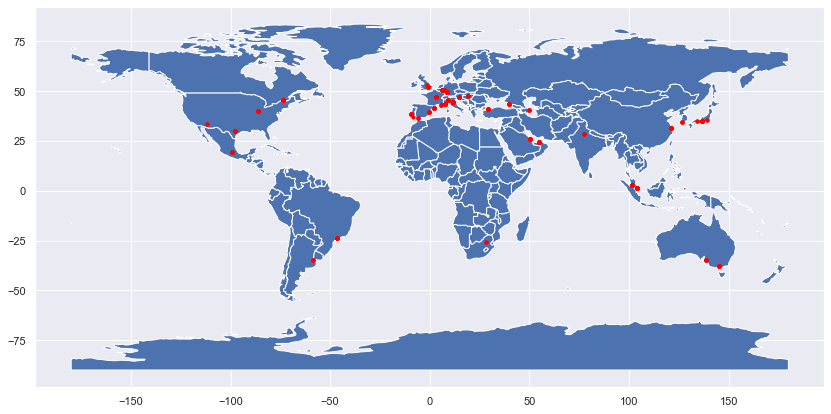

In [58]:
#On plot la carte du monde avec la localisation des différents circuits

geometry = [Point(xy) for xy in zip(races['long'], races['lat'])]
gdf = GeoDataFrame(races, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 7)), marker='o', color='red', markersize=10);

# III- Modélisation 

## III-1. Préparation des données pour la modélisation

L'idée est de créer un dataframe unique dans lequel nous pouvons retrouver toutes les variables a priori utiles pour la modélisation, ainsi que notre target, c'est à dire le vainqueur de la course (ou un proxy : le classement de la course). Il faudra pour cela notamment mergé les dataframes, gérer les valeurs manquantes mais aussi préparer les variables catégorielles. 

### Préparation du merge des dataframes 

In [59]:
# On modifie la colonne driver_name de "qualifying_results" pour pouvoir par la suite effectuer le merge

qualifying_results["driver_name"]=qualifying_results["driver_name"].str.split()

taille=len(qualifying_results)
for i in range(taille):
    qualifying_results.iloc[i,1]=qualifying_results.iloc[i,1][1]

qualifying_results.rename(columns={'driver_name': 'driver'}, inplace=True)
qualifying_results["driver"]=qualifying_results["driver"].str.lower()

### Merge des dataframes 

Nous allons merger les dataframes à partir du dataframe results car ce dernier est selon nous le plus complet. Nous allons ainsi merger les dataframes les uns après les autres sur des clés uniques et communes avec la méthode "left"

In [62]:
weather_info

,season,round,circuit_id,weather,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,1990,1,phoenix,Cloudy and cool with temperatures reaching up ...,0,1,0,0,1
1,1990,2,interlagos,"Hot, dry, sunny",1,0,0,0,0
2,1990,3,imola,"Warm, dry, sunny",1,0,0,0,0
3,1990,4,monaco,"Warm, dry, sunny",1,0,0,0,0
4,1990,5,villeneuve,Warm and cloudy with temperatures approaching ...,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
546,2020,13,imola,Partly cloudy,0,0,0,0,1
547,2020,14,istanbul,Overcast. Wet and drying track. Air: 11–14 °C ...,0,0,0,1,0
548,2020,15,bahrain,Clear,1,0,0,0,0
549,2020,16,bahrain,Clear,1,0,0,0,0


In [63]:
# On merge les dataframes

results_2=results.merge(how="left",on=["season","round","constructor"],right=constructor_standings)
results_2.head()
results_3=results_2.merge(how="left",on=["season","round","driver"],right=driver_standings)
results_3.head(30)
results_4=results_3.merge(how="left",on=["season","round","driver"],right=qualifying_results)
results_5=results_4.merge(how="left",on=["season","round","circuit_id"],right=weather)

In [64]:
# Nous renommons quelques variables et nous conservons notre dataframe mergé sous le nom de "df_merged"

results_5=results_5.drop(columns="grid_y")
results_5.rename(columns={'grid_x': 'grid'}, inplace=True)
df_merged=results_5.copy()

On dispose maintenant d'un dataframe contenant toutes nos metrics: df_merged: 

In [65]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12399 entries, 0 to 12398
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     12399 non-null  int64  
 1   round                      12399 non-null  int64  
 2   circuit_id                 12399 non-null  object 
 3   driver                     12399 non-null  object 
 4   date_of_birth              12399 non-null  object 
 5   nationality                12399 non-null  object 
 6   constructor                12399 non-null  object 
 7   grid                       12399 non-null  int64  
 8   time                       4464 non-null   float64
 9   status                     12399 non-null  object 
 10  points                     12394 non-null  float64
 11  podium                     12399 non-null  int64  
 12  constructor_points         12213 non-null  float64
 13  constructor_wins           12213 non-null  flo

<AxesSubplot:>

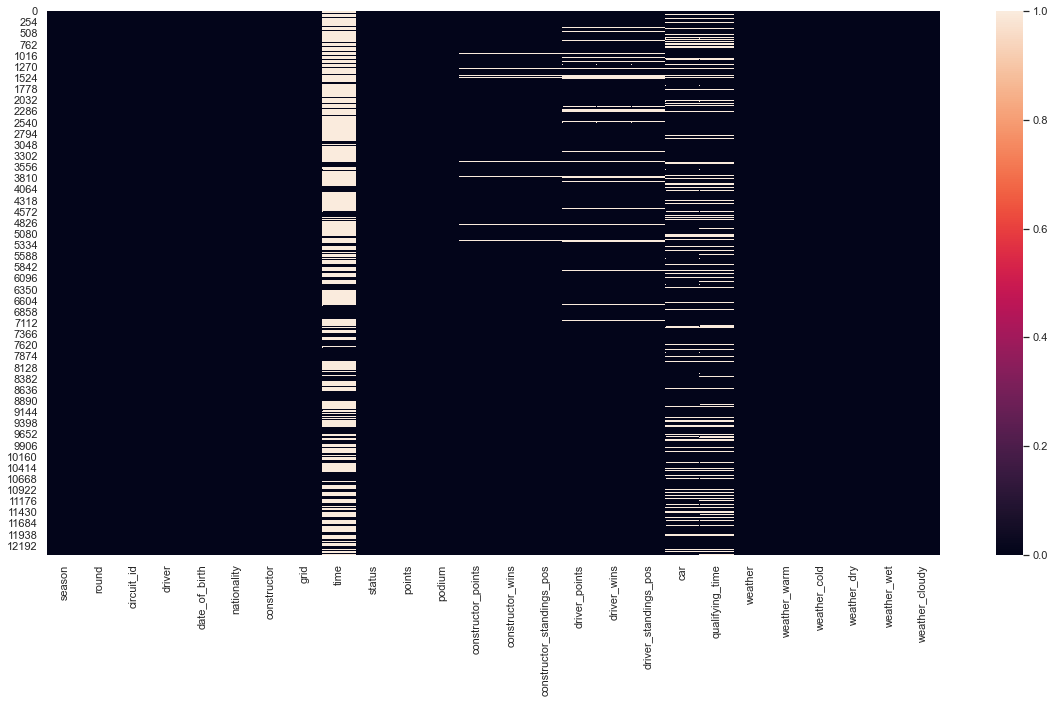

In [68]:
# Visualisation rapide des valeurs manquantes par variable

df_merged_na=df_merged.isna().copy()
sns.heatmap(df_merged_na)


* On va devoir gérer quelques valeurs manquantes pour 'qualifying_time', 'driver_wins, 'driver_points', driver_standings_pos notamment.   

### Gestion des valeurs manquantes

* On remplace certaines valeurs manquantes par des 0 (Voir ci-dessous les catégories importantes) ce qui est très simple à implémenter et qui est plausibles pour ces valeurs manquantes. 
* On supprime ensuite toutes les lignes contenant encore des valeurs manquantes.

In [69]:
x_var= ['driver_points', 'driver_wins', 'driver_standings_pos', 'constructor_points', 
            'constructor_wins' , 'constructor_standings_pos']
for var in x_var:
    df_merged[var].fillna(0, inplace = True) # On remplit les valeurs manquantes par des 0
    df_merged[var] = df_merged[var].map(lambda x: int(x)) # conversion des valeurs en entier.


In [70]:
df_merged.dropna(inplace = True ) # supression des valeurs manquantes restantes 

### Création de nouvelle variables 

Nous allons maintenant créer des variables qui ne sont pas directement accesssibles dans nos données et qui vont sans nous permettre de prédire le vainqueur de la course. Nous allons ainsi créer la variables "age" qui correspondra à l'âge (à l'année prêt) des pilotes, mais également la variables "qualifying_time" contenant la différence cumulée des temps de qualification par rapport au pilote en pôle position. 

In [71]:
# Ajout de l'âge des pilote
df_merged["date_of_birth"]=pd.to_datetime(df_merged["date_of_birth"])
df_merged["season"]=pd.to_datetime(df_merged["season"], format="%Y") # conversion en format date
df_merged["age"]=round(((df_merged["season"]-df_merged['date_of_birth']).dt.days)/365) #On détermine l'âge du pilote à l'année prêt 


In [72]:
df_merged['qualifying_time'] = df_merged.qualifying_time.map(lambda x: 0 if str(x) == '00.000' else(float(str(x).split(':')[1]) + (60 * float(str(x).split(':')[0])) if len(str(x).split(':'))>1 else 0))
df_merged = df_merged[df_merged['qualifying_time'] != 0] # On enlève les valeurs manquantes
df_merged.sort_values(['season', 'round', 'grid'], inplace = True)
df_merged['qualifying_time_diff'] = df_merged.groupby(['season', 'round']).qualifying_time.diff()
df_merged['qualifying_time'] = df_merged.groupby(['season', 'round']).qualifying_time_diff.cumsum().fillna(0)
df_merged.drop('qualifying_time_diff', axis = 1, inplace = True)

In [73]:
df_merged['qualifying_time']

1        0.000
0        0.023
3        0.454
2        0.651
4        0.719
         ...  
12384    0.544
12388    0.775
12386    0.971
12387    1.088
12385    1.135
Name: qualifying_time, Length: 3498, dtype: float64

### Préparation de nos variables catégorielles pour la modélisation

Nous disposons de multiples variables catégorielles telles que les variables liées aux constructeurs, aux nationalité, aux circuits. Ces variables sont à priori utiles pour les prédiction du gagnant d'un grand prix. Ainsi, pour pouvoir les exploiter lors de la modélisation, nous devons les représenter sous forme d'indicatrice: 

In [74]:


df_ind = pd.get_dummies(df_merged, columns = ['circuit_id', 'nationality', 'constructor'] )

for col in df_ind.columns:
    if 'nationality' in col and df_ind[col].sum() < 100: # critère arbitraire pour enlever les colonnes non significatives 
        df_ind.drop(columns=col,inplace=True)
        
    elif 'constructor' in col and df_ind[col].sum() < 100: # critère arbitraire pour enlever les colonnes non significatives
        df_ind.drop(columns=col,inplace=True)
        
    elif 'circuit_id' in col and df_ind[col].sum() < 100:  # critère arbitraire pour enlever les colonnes non significatives
        df_ind.drop(columns=col,inplace=True)

In [75]:
del df_ind['date_of_birth'] #On enlèves les colonnes en trop
del df_ind['status']
del df_ind['car']
del df_ind['weather']

In [76]:
df_ind['season']=pd.to_datetime(df_ind['season']) # On passe sous le format date
df_ind['season'] = df_ind['season'].dt.year

In [77]:
final_merged=df_ind.copy() #On renomme et copie notre dataframe final sous le nom de final_merged

In [78]:
np.set_printoptions(precision=4)

## III-2. Classification

Nous souhaitons à travers ce projet prédire le gagnant d'un grand prix de F1. Nous pouvons alors procéder par classification en considérant que le gagnant est de la catégorie 1 et le perdant de la catégorie 0.

Pour évaluer la performance de notre modèle, nous avons décidé d'entraîner notre modèle sur les années précédants 2020 et de mesurer la performance de notre modèle comme le pourcentage de course "bien" prédite en 2020. Il existe d'autres approches mais nous avons choisie cette dernière car elle permet d'évaluer intuitivement la pertinence ou non du modèle sur une année récente. 

In [79]:
# On initialise notre dictionnaire qui va nous permettre de comparer nos modèles 
comparison_dict ={'model':[],
                  'params': [],
                  'score': []}

In [80]:
df = final_merged.copy()

df["podium"] = df["podium"].map(lambda x: 1 if x == 1 else 0) # on divise en 2 classes les gagnants et les perdants

# On prépare le dataset d'entraînement

train = df[df["season"]<2020] # données d'entraînement
X_train = train.drop(['driver', 'podium'], axis = 1) # les variables explicatives
y_train = train["podium"] # la target

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns) # process pour préparer les données 

On implémente une fonction qui va nous retourner la performance de notre modèle, c'est à dire : le poucentage de course "bien" prédite en 2020

In [81]:
# On implémente une fonction qui va nous retourner la performance de notre modèle, c'est à dire
# le poucentage de course "bien" prédite en 2020

def score_classification(model,xvar):
    score = 0
    for circuit in df[df.season == 2020]['round'].unique():

        test = df[(df.season == 2020) & (df['round'] == circuit)]
        X_test = test["xvar"]
        y_test = test['podium']

        #scaling
        X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

        # make predictions
        prediction_df = pd.DataFrame(model.predict_proba(X_test), columns = ['proba_0', 'proba_1'])
        prediction_df['actual'] = y_test.reset_index(drop = True)
        prediction_df.sort_values('proba_1', ascending = False, inplace = True)
        prediction_df.reset_index(inplace = True, drop = True)
        prediction_df['predicted'] = prediction_df.index
        prediction_df['predicted'] = prediction_df['predicted'].map(lambda x: 1 if x == 0 else 0)

        score += precision_score(prediction_df.actual, prediction_df.predicted)

    model_score = score / df[df.season == 2020]['round'].unique().max()
    return model_score

###  SVM Classifier

Nous avons choisi d'utiliser le modèle SVM pour la classification car ce dernier est très courant pour résoudre des problèmes de classifications. 

Nous allons pour trouver les paramètres du modèles permettant d'avoir le meilleur score, tester différentes combinaisons de paramètres. Ce code est assez lent à faire tourner. 

In [8]:
params={'gamma': np.logspace(-4, -1, 20),
        'C': np.logspace(-2, 1, 20),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 

for gamma in params['gamma']:
    for c in params['C']:
        for kernel in params['kernel']:
            model_params = (gamma, c, kernel)
            model = svm.SVC(probability = True, gamma = gamma, C = c, kernel = kernel )
            model.fit(X_train, y_train)
            
            model_score = score_classification(model,train.columns.drop(["driver","podium"])
            
            # On stocke nos résultats dans ce dictionnaire afin de les comparer par la suite
                                               
            comparison_dict['model'].append('svm_classifier') 
            comparison_dict['params'].append(model_params)
            comparison_dict['score'].append(model_score)

## III-3. Régression

Nous pouvons également considérer notre problème comme un problème de regression. En effet, le classsement de la course peut être vu comme une variables continue, le vainqueur correspondra alors à cela dont la prédication de classement sera la plus basse. 

Afin de pouvoir comparer notre classfication à notre régression nous utilisons bien évidemment les mêmes données de test (2020) et le même indicateur de performance du modèle. 

In [82]:
# On prépare notre dataset d'entraînement

df = final_merged.copy()

train = df[df.season<2020]
X_train = train.drop(['driver', 'podium'], axis = 1)
y_train = train.podium

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

On implémente une fonction qui va nous retourner la performance de notre modèle, c'est à dire : le poucentage de courses "bien" prédite en 2020

In [70]:
# la fonction score: 

def score_regression(model,xvar):
    score=0
    les_circuits=df[df['season']==2020]["round"].unique()
    for circuit in les_circuits:
        test=df[(df['season']==2020) & (df['round']==circuit)]
        X_test=test[xvar]
        y_test=test["podium"]
        
        X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
        
        #On fait les prédictions
        
        prediction_df = pd.DataFrame(model.predict(X_test), columns = ['results'])
        prediction_df['podium'] = y_test.reset_index(drop = True)
        prediction_df['actual'] = prediction_df['podium'].map(lambda x: 1 if x == 1 else 0)
        prediction_df.sort_values('results', ascending = True, inplace = True)
        prediction_df.reset_index(inplace = True, drop = True)
        prediction_df['predicted'] = prediction_df.index
        prediction_df['predicted'] = prediction_df.predicted.map(lambda x: 1 if x == 0 else 0)
        
        score += precision_score(prediction_df['actual'],prediction_df['predicted'])
    
    model_score = score / df[df.season == 2020]['round'].unique().max()
    return model_score

### Régression linéaire

Pour la regression nous avons choisi de réaliser une regression linéaire. En effet, c'est un modèle très standard, facile à interpréter et relativement rapide à faire tourner.

Dans un premier temps nous allons réaliser la regression sur toutes les variables explicatives afin de stocker son score dns notre dictionnaire de comparaison. 

Dans un second temps, nous allons regresser sur différentes combinaisons de variables afin de comprendre quelles types de variables permettent le mieux de prédire le vainqueur de la course. 

In [71]:
# Regression sur toutes les variables explicatives. 
model = LinearRegression(fit_intercept = 'True')
model.fit(X_train, y_train)
model_score=score_regression(model,train.columns.drop(["driver","podium"]))
comparison_dict['model'].append('regression_lineaire')
comparison_dict['params'].append('True')
comparison_dict['score'].append(model_score)

In [94]:
xvar_total=df.columns.drop(["driver",'podium'])
xvar_series=pd.Series(xvar_total)

xvar_weather=list(xvar_series[xvar_series.str.contains("weather")])
xvar_nationality=list(xvar_series[xvar_series.str.contains("nationality")])
xvar_circuit=list(xvar_series[xvar_series.str.contains("circuit")])
xvar_constructor=list(xvar_series[xvar_series.str.contains("constructor")])
xvar_grid=list(["grid","constructor_standings_pos","driver_standings_pos","qualifying_time"])

xvar_comparison={'xvar':[],'score':[]}

xvar_combinaison=[xvar_weather+xvar_grid,xvar_grid+xvar_circuit,xvar_nationality+xvar_circuit,xvar_constructor+xvar_circuit,xvar_weather+xvar_grid+xvar_constructor]
xvar_comparison['type_var']=["weather+grid","grid+circuit",'nationality+circuit','constructor+circuit',"weather+grid+constructor"]
    
for xvar in xvar_combinaison:
    X_train_2 = train[xvar].copy()
    y_train_2 = train["podium"].copy()

    scaler = StandardScaler()
    X_train_2 = pd.DataFrame(scaler.fit_transform(X_train_2), columns = X_train_2.columns)
    
    model = LinearRegression(fit_intercept = 'True')
    model.fit(X_train_2, y_train_2)
    
    model_score=score_regression(model,xvar)
    
    
    xvar_comparison['xvar'].append(xvar)
    xvar_comparison['score'].append(model_score)

<AxesSubplot:xlabel='type_var', ylabel='score'>

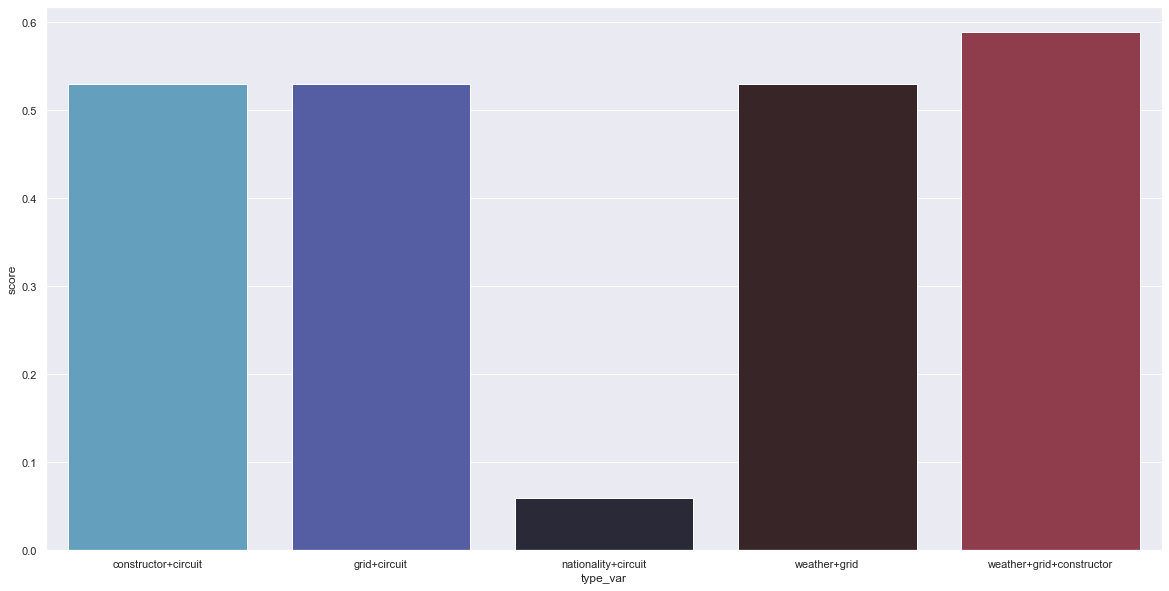

In [95]:
# Tracé d'un graphique pour ocomparer le scores 

comparaison_xvar=pd.DataFrame(xvar_comparison)
comparaison_xvar=comparaison_xvar.groupby("type_var")["score"].max().reset_index()
_,(ax1) = plt.subplots(ncols=1)
sns.barplot(data=comparaison_xvar, x='type_var', y='score', ax=ax1, palette=sns.color_palette("icefire"))

qq lignes pour analyser et essayer d'expliquer cela 

# III-4. Comparaison de nos deux modèles 

Dans cette dernière section liée à la modélisation nous allons comparer nos modèles en comparant les scores maximaux obtenus. 

<AxesSubplot:xlabel='model', ylabel='score'>

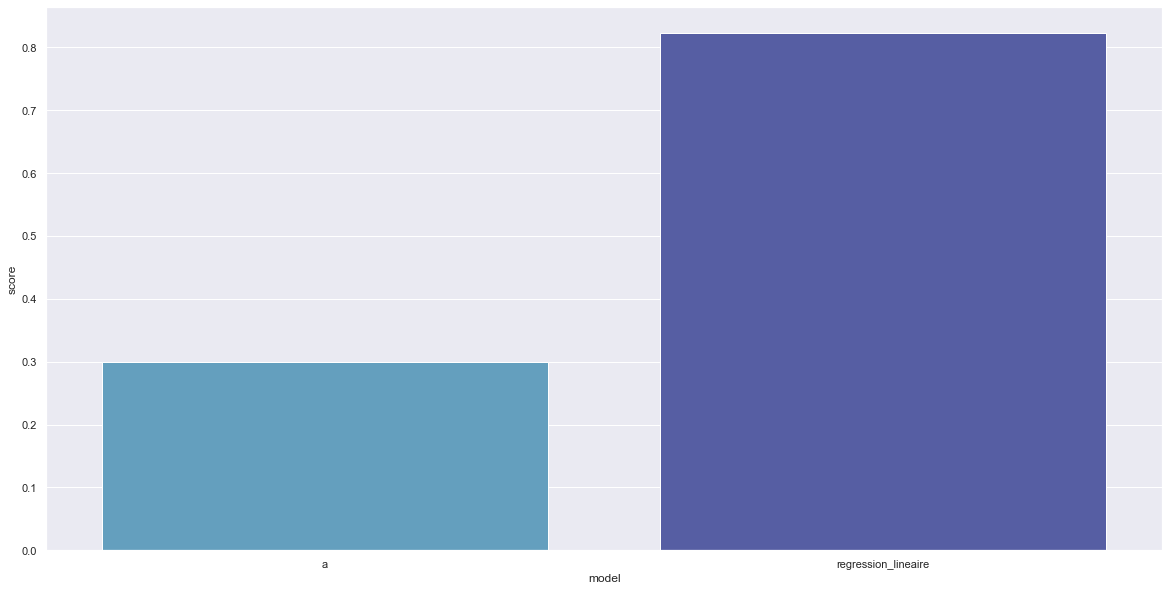

In [80]:
comparaison_model=pd.DataFrame(comparison_dict)
comparaison_model=comparaison_model.groupby("model")["score"].max().reset_index()
_,(ax1) = plt.subplots(ncols=1)
sns.barplot(data=comparaison_model, x='model', y='score', ax=ax1, palette=sns.color_palette("icefire"))

rédiger qq lignes pour analyser le résulat 